# Face Detection with Haar Cascades

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [2]:
nadia = cv2.imread('Nadia_Murad.jpg',0)
denis = cv2.imread('Denis_Mukwege.jpg',0)
solvay = cv2.imread('solvay_conference.jpg',0)
vessy = cv2.imread('vessy.jpg',0)
red = cv2.imread('red.jpg',0)

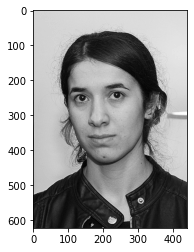

In [3]:
plt.imshow(nadia,cmap='gray')

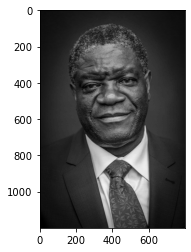

In [4]:
plt.imshow(denis,cmap='gray')

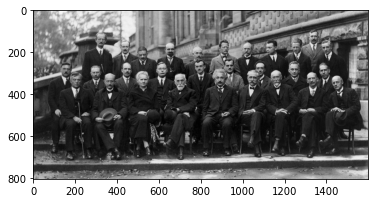

In [5]:
plt.imshow(solvay,cmap='gray')

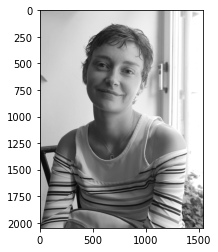

In [6]:
plt.imshow(vessy,cmap='gray')

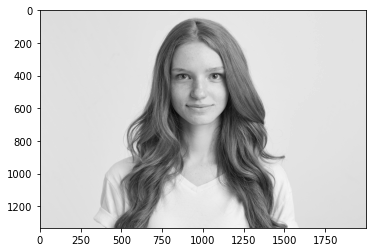

In [7]:
plt.imshow(red,cmap='gray')

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own "haarcascades" folder.

## Face Detection

In [8]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')

In [9]:
def detect_face(img):
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [10]:
result = detect_face(denis)

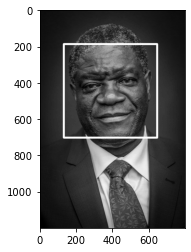

In [11]:
plt.imshow(result,cmap='gray')

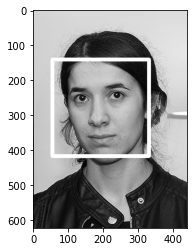

In [12]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

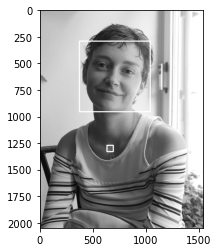

In [13]:
result = detect_face(vessy)
plt.imshow(result,cmap='gray')
# Sometimes the settings made may not give the same result for each picture. Change the scaleFactor and  minNeighbors
# Try def adj_detect_face()

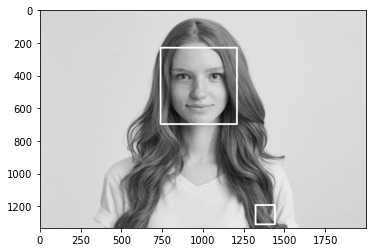

In [14]:
result = detect_face(red)
plt.imshow(result,cmap='gray')
# Try def adj_detect_face()

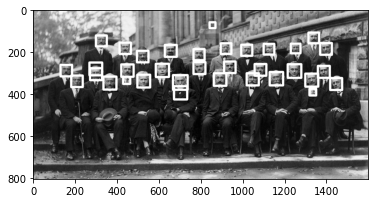

In [15]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [16]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

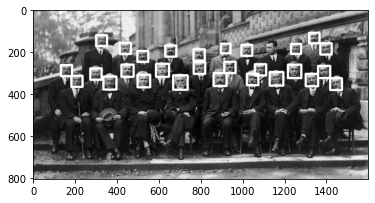

In [17]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

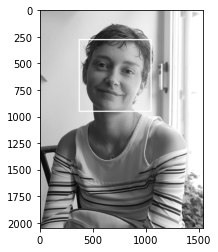

In [18]:
result = adj_detect_face(vessy)
plt.imshow(result,cmap='gray')

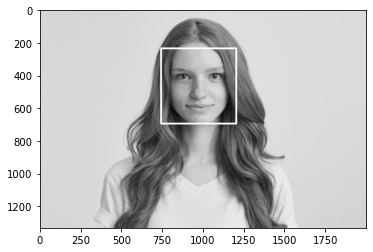

In [19]:
result = adj_detect_face(red)
plt.imshow(result,cmap='gray')

## Eye Cascade File

In [20]:
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [21]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img)     
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

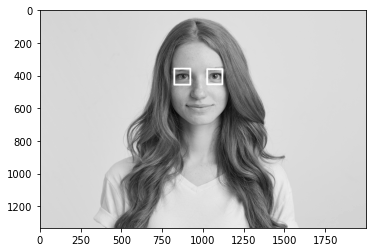

In [22]:
result = detect_eyes(red)
plt.imshow(result,cmap='gray')

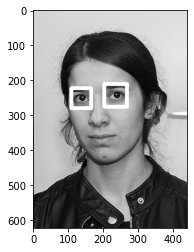

In [23]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

## Face Detection for Video Camera

In [ ]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()